In [1]:
# import libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

# book

In [14]:
# import dataset
book = pd.read_csv("C:/Users/USER/Desktop/Excelr/Data Science/Assignment/Assignment 9 Association Rules/book.csv")

In [15]:
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [16]:
# antecedent and consequent
frequent_itemsets1 = apriori(book, min_support=0.1,  use_colnames=True, max_len=3)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [17]:
# using association rule to find best rule
rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [18]:
rules1.sort_values('confidence',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
83,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
89,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
94,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
53,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
52,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
76,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000
40,"(CookBks, YouthBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
47,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
70,"(GeogBks, DoItYBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446


In [19]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [20]:
# insights
# if child book then youth book also purchased with confidence of 39%
# if Art and geog book the cook book with 81% of confidence

SyntaxError: invalid syntax (<ipython-input-20-74b27bfcb407>, line 2)

In [21]:
rules1.lift>1

0     True
1     True
2     True
3     True
4     True
      ... 
95    True
96    True
97    True
98    True
99    True
Name: lift, Length: 100, dtype: bool

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

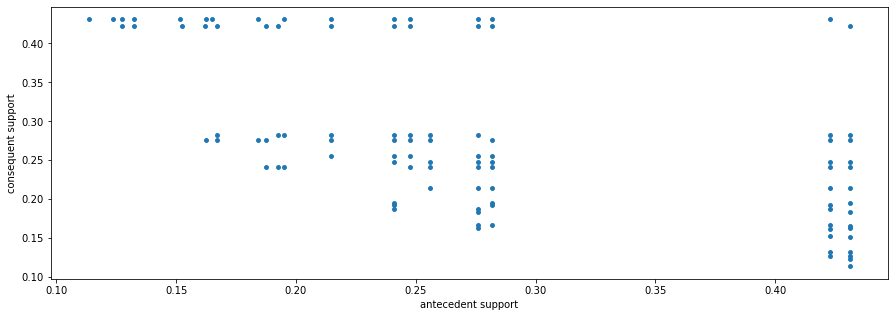

In [22]:
rules1.plot.scatter(x='antecedent support',y='consequent support',s=15, figsize = (15,5))

# groceries

In [4]:
groceries = pd.read_csv('groceries.csv',header=None,error_bad_lines=False)
groceries.head(10)

b'Skipping line 6: expected 4 fields, saw 5\nSkipping line 8: expected 4 fields, saw 5\nSkipping line 11: expected 4 fields, saw 5\nSkipping line 12: expected 4 fields, saw 9\nSkipping line 24: expected 4 fields, saw 5\nSkipping line 25: expected 4 fields, saw 11\nSkipping line 30: expected 4 fields, saw 6\nSkipping line 32: expected 4 fields, saw 7\nSkipping line 33: expected 4 fields, saw 5\nSkipping line 34: expected 4 fields, saw 8\nSkipping line 41: expected 4 fields, saw 6\nSkipping line 42: expected 4 fields, saw 13\nSkipping line 45: expected 4 fields, saw 8\nSkipping line 50: expected 4 fields, saw 10\nSkipping line 54: expected 4 fields, saw 10\nSkipping line 55: expected 4 fields, saw 5\nSkipping line 58: expected 4 fields, saw 7\nSkipping line 59: expected 4 fields, saw 6\nSkipping line 61: expected 4 fields, saw 7\nSkipping line 64: expected 4 fields, saw 5\nSkipping line 70: expected 4 fields, saw 8\nSkipping line 72: expected 4 fields, saw 7\nSkipping line 73: expected 4

,0,1,2,3
0,citrus fruit,semi-finished bread,margarine,ready soups
1,tropical fruit,yogurt,coffee,NaN
2,whole milk,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads
4,other vegetables,whole milk,condensed milk,long life bakery product
5,rolls/buns,NaN,NaN,NaN
6,pot plants,NaN,NaN,NaN
7,whole milk,cereals,NaN,NaN
8,beef,NaN,NaN,NaN
9,frankfurter,rolls/buns,soda,NaN


In [5]:
df=pd.get_dummies(groceries)
df

,0_Instant food products,0_UHT-milk,0_abrasive cleaner,0_artif. sweetener,0_baby cosmetics,0_bags,0_baking powder,0_bathroom cleaner,0_beef,0_berries,...,3_sugar,3_syrup,3_toilet cleaner,3_waffles,3_whipped/sour cream,3_white bread,3_white wine,3_whole milk,3_yogurt,3_zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
frequent_itemsets2 = apriori(df, min_support=0.002,  use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.008680,(0_UHT-milk)
1,0.020308,(0_beef)
2,0.009499,(0_berries)
3,0.011464,(0_beverages)
4,0.028824,(0_bottled beer)
...,...,...
264,0.002457,"(1_whole milk, 2_curd)"
265,0.004586,"(1_whole milk, 2_rolls/buns)"
266,0.002784,"(1_whole milk, 2_yogurt)"
267,0.002129,"(1_yogurt, 2_whipped/sour cream)"


In [16]:
rule2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.01)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_other vegetables),(0_beef),0.031117,0.020308,0.002948,0.094737,4.665025,0.002316,1.082218
1,(0_beef),(1_other vegetables),0.020308,0.031117,0.002948,0.145161,4.665025,0.002316,1.133410
2,(1_root vegetables),(0_beef),0.012283,0.020308,0.002784,0.226667,11.161505,0.002535,1.266843
3,(0_beef),(1_root vegetables),0.020308,0.012283,0.002784,0.137097,11.161505,0.002535,1.144644
4,(0_bottled beer),(1_liquor),0.028824,0.004749,0.003439,0.119318,25.122649,0.003302,1.130091
...,...,...,...,...,...,...,...,...,...
129,"(1_rolls/buns, 0_sausage)",(2_soda),0.009171,0.027186,0.002293,0.250000,9.195783,0.002043,1.297085
130,"(0_sausage, 2_soda)",(1_rolls/buns),0.002948,0.050278,0.002293,0.777778,15.469417,0.002145,4.273747
131,(1_rolls/buns),"(0_sausage, 2_soda)",0.050278,0.002948,0.002293,0.045603,15.469417,0.002145,1.044693
132,(2_soda),"(1_rolls/buns, 0_sausage)",0.027186,0.009171,0.002293,0.084337,9.195783,0.002043,1.082089


In [18]:
rule2.sort_values('confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
130,"(0_sausage, 2_soda)",(1_rolls/buns),0.002948,0.050278,0.002293,0.777778,15.469417,0.002145,4.273747
107,(2_liquor),(1_bottled beer),0.003275,0.018343,0.002457,0.750000,40.888393,0.002397,3.926630
5,(1_liquor),(0_bottled beer),0.004749,0.028824,0.003439,0.724138,25.122649,0.003302,3.520513
121,(2_curd),(1_whole milk),0.003439,0.040616,0.002457,0.714286,17.586406,0.002317,3.357845
80,(1_dessert),(0_whole milk),0.004913,0.085981,0.002129,0.433333,5.039873,0.001707,1.612975
...,...,...,...,...,...,...,...,...,...
97,(0_whole milk),(2_pastry),0.085981,0.010318,0.002457,0.028571,2.769161,0.001569,1.018791
103,(0_whole milk),(3_newspapers),0.085981,0.011628,0.002457,0.028571,2.457143,0.001457,1.017442
99,(0_whole milk),(2_rolls/buns),0.085981,0.019325,0.002293,0.026667,1.379887,0.000631,1.007543
83,(0_whole milk),(1_frozen vegetables),0.085981,0.007206,0.002293,0.026667,3.700606,0.001673,1.019994


In [19]:
rule2.lift>1

0      True
1      True
2      True
3      True
4      True
       ... 
129    True
130    True
131    True
132    True
133    True
Name: lift, Length: 134, dtype: bool

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

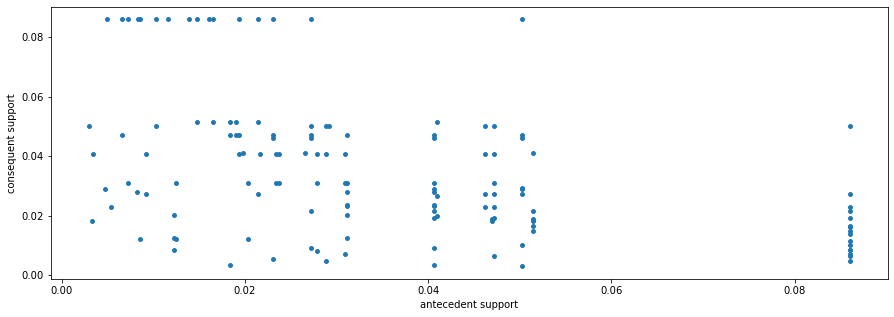

In [20]:
rule2.plot.scatter(x='antecedent support',y='consequent support',s=15, figsize = (15,5))

# my_movies

In [30]:
my_movies = pd.read_csv("C:/Users/USER/Desktop/Excelr/Data Science/Assignment/Assignment 9 Association Rules/my_movies.csv")
my_movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [31]:
my_movies_drop = my_movies.drop(my_movies.iloc[:, 0:5], axis = 1)
my_movies_drop

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [32]:
frequent_itemsets3 = apriori(my_movies_drop, min_support=0.1, use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [33]:
rules3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1.2)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
1,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
2,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.20
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.80
...,...,...,...,...,...,...,...,...,...
225,(LOTR2),"(Harry Potter1, Sixth Sense, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
226,(Sixth Sense),"(Harry Potter1, LOTR2, LOTR1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
227,(Green Mile),"(LOTR2, Sixth Sense, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
228,(LOTR1),"(Harry Potter1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [34]:
rules3.sort_values('confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
100,"(LOTR1, Green Mile)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
94,"(LOTR1, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
177,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
176,"(LOTR2, Harry Potter1)","(Sixth Sense, Green Mile)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
...,...,...,...,...,...,...,...,...,...
37,(Gladiator),"(LOTR, Sixth Sense)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
90,(Gladiator),"(LOTR, Green Mile)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
9,(Gladiator),(Braveheart),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
84,(Gladiator),"(Braveheart, Patriot)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05


In [35]:
rules3.lift>1

0      True
1      True
2      True
3      True
4      True
       ... 
225    True
226    True
227    True
228    True
229    True
Name: lift, Length: 230, dtype: bool

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

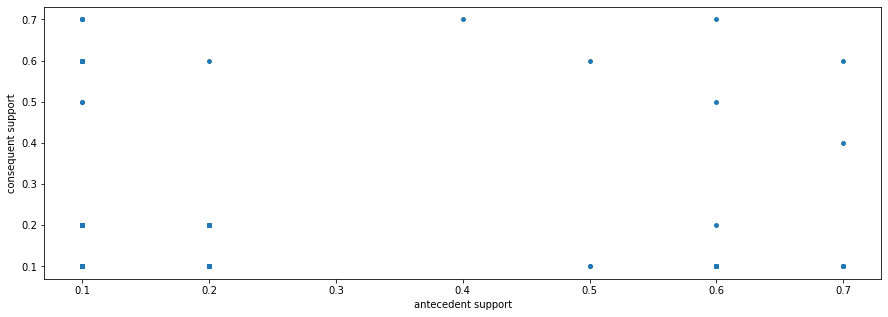

In [36]:
rules3.plot.scatter(x='antecedent support',y='consequent support',s=15, figsize = (15,5))